### **0º Librerias y bibliotecas para el proyecto**

In [1]:
#Libreria de manejo y tratamiento de datos

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Libreria de visualizacion de datos

import matplotlib.pyplot as plt
import seaborn as sns

#Libreria para el Conteo de Numeros

from collections import Counter

#Libreria de Modelos de Machine Learning

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn import model_selection, ensemble, preprocessing, base, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Libreria de entrenamiento de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import imblearn

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Libreria de Metricas

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#LIbreria para serializar y deserializar

import pickle #La serialización es el proceso de convertir objetos en una representación de bytes, mientras que la deserialización es el proceso de reconstruir los objetos a partir de esta representación.

### **1º Recopilacion de los datos e informacion general**

*El DataFrame en el cual se va a trabajar trata sobre el cancer de pecho y los diferentes subtipos de cánceres*

In [8]:
df = pd.read_csv("Breast_GSE45827.csv") 

*En esta parte se trabajara on las varianzas de los datos originales*

In [12]:
Type_objetivo = df["type"]

In [17]:
Type_objetivo

0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object

In [23]:
Type_Varianza = pd.DataFrame(Type_objetivo)

In [24]:
#Creamos un DataFrame sobre los Types de la varianza

Type_Varianza

,type
0,basal
1,basal
2,basal
3,basal
4,basal
...,...
146,luminal_B
147,luminal_B
148,luminal_B
149,luminal_B


In [25]:
#Se carga el Dataframe que se calculo previamente sobre las varianzas

df = pd.read_csv("df_var.csv") 

In [26]:
df

,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,201852_x_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,11.796615,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,11.994220,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,8.401393,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,12.153453,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,11.971752,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,12.068921,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,12.773526,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,12.766966,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,13.869308,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [30]:
# Unir el DataFrame de type con el df de las varianzas por columnas

df = pd.merge(Type_Varianza, df, left_index=True, right_index=True)

In [31]:
df

,type,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,basal,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,basal,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,basal,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,basal,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,basal,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,luminal_B,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,luminal_B,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,luminal_B,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,luminal_B,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [32]:
df.shape

(151, 136)

In [33]:
df.head()

,type,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,basal,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,basal,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,basal,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,basal,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,basal,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 136 entries, type to AFFX-HUMRGE/M10098_5_at
dtypes: float64(135), object(1)
memory usage: 160.6+ KB


In [35]:
df.columns

Index(['type', '1553394_a_at', '1553434_at', '1553602_at', '1555745_a_at',
       '1555778_a_at', '1558034_s_at', '200795_at', '201525_at', '201744_s_at',
       ...
       '234764_x_at', '237086_at', '237339_at', '237395_at', '238481_at',
       '240304_s_at', '242579_at', '243241_at', '37892_at',
       'AFFX-HUMRGE/M10098_5_at'],
      dtype='object', length=136)

In [36]:
df["type"].unique() # Va a ser nuestra variable objetivo

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

In [37]:
df.describe()

,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,201852_x_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,6.685405,5.535761,9.094182,6.601842,10.530257,6.008458,9.613856,8.389017,11.045581,12.099818,...,7.703488,7.217548,7.352629,5.974286,7.773005,7.563606,6.632232,5.398441,9.426314,9.435028
std,2.731975,2.323224,3.269682,2.476202,2.441292,2.460560,2.304915,2.543324,2.493283,2.524035,...,2.424169,2.661611,3.297496,2.691707,2.423676,2.565959,2.512620,2.329175,2.650621,2.260122
min,3.860604,3.039451,4.553402,2.939503,3.366979,3.552594,2.798134,3.941470,2.678161,3.317545,...,3.327164,2.852040,3.393071,2.921496,2.619521,3.247388,3.341649,3.329233,3.387198,5.843880
25%,4.231660,3.450385,6.232775,4.095818,9.977181,3.958873,9.274311,6.405600,11.127327,12.047344,...,5.715911,3.961530,4.039597,3.743538,6.061360,4.857158,4.745157,3.634164,8.108804,7.720253
50%,5.157634,4.594248,8.194237,6.694838,11.346358,4.742183,10.089184,8.165655,11.838770,12.836633,...,7.455669,8.386519,7.314178,4.866122,8.027537,8.149753,5.860915,3.891223,10.140169,8.951100
75%,9.810414,7.237167,12.009531,8.644426,12.001881,8.064029,11.000191,10.156123,12.291117,13.399010,...,9.690679,9.461871,10.487498,7.816843,9.628959,9.802399,8.221941,7.331876,11.493117,10.634299
max,12.051739,11.548989,14.853935,12.104032,13.532884,12.198959,12.298360,14.159759,13.158096,14.378718,...,13.306457,10.939596,13.291674,12.365011,12.611375,13.204965,13.663362,11.410927,13.416688,14.970100


### **2º Procesamiento de los datos y su preparacion**

*Vamos a quitar primero los Nans y lo siguiente es tratar la variable objetivo ("type") para ponerlo en variable numerica*

In [38]:
df.duplicated().sum() #Para ver si hay filas duplicadas

0

In [39]:
df.isnull().sum() #Por si hay Null en nuestro DataFrame

type                       0
1553394_a_at               0
1553434_at                 0
1553602_at                 0
1555745_a_at               0
                          ..
240304_s_at                0
242579_at                  0
243241_at                  0
37892_at                   0
AFFX-HUMRGE/M10098_5_at    0
Length: 136, dtype: int64

In [40]:
df.isnull().sum().sum() #Al ser tantas columnas hacemos sum() sobre sum() para ver si en alguna columna intermedia hay Null

0

In [41]:
#Distribucion de la columna type para ver su representacion

objetivo  = "type"

val_counts = df[objetivo].value_counts()
print(val_counts)

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64


<Axes: xlabel='type', ylabel='count'>

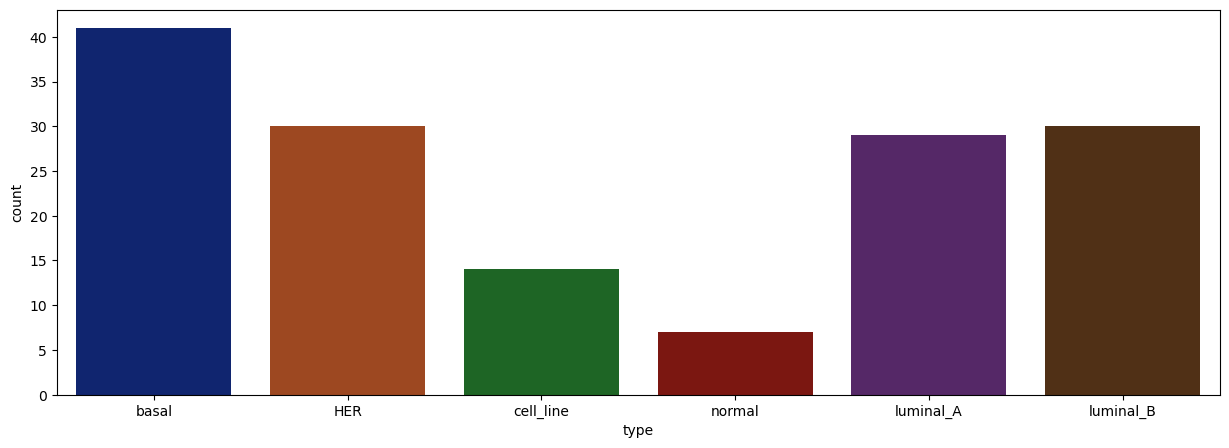

In [42]:
#Distribucion de la columna type para ver su representacion en un countplot 

plt.figure(figsize = (15, 5))
sns.countplot(x = df[objetivo],palette="dark")



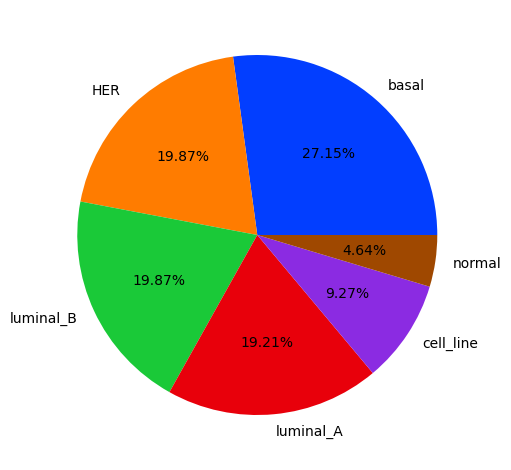

In [43]:
#Distribucion de la columna type para ver su representacion en un Piechart

plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%", colors= sns.color_palette('bright'))

plt.tight_layout()
plt.show()

In [44]:
# Aplicacion de un Label Encoder para ordenar cada valor categorico por un valor numerico

clase_LabelEncoder = LabelEncoder()

clase = clase_LabelEncoder.fit_transform(df["type"])

df["type"] = clase

df

,type,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,1,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,1,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,1,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,1,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,1,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,4,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,4,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,4,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,4,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [45]:
#Creamos el mapa de clase inversa para posteriormente usarlo

mapa_clase = {"normal": 0, "cell_line": 1, "luminal_A": 2, "luminal_B": 3, "HER": 4, "basal": 5}
mapa_clase_inversa = {m : n for m, n in zip(mapa_clase.values(), mapa_clase.keys())}
mapa_clase_inversa

{0: 'normal',
 1: 'cell_line',
 2: 'luminal_A',
 3: 'luminal_B',
 4: 'HER',
 5: 'basal'}

In [46]:
df["type"].unique()

array([1, 0, 2, 5, 3, 4])

### **3º Modelos**

*Una vez que todas las columnas las tenemos en variables numericas, podemos empezar a tratar el DataFrame definiendo las variables X e Y*

In [47]:
X = df.drop(objetivo, axis = 1).values
Y = df[objetivo].values

print(X.shape, Y.shape)

(151, 135) (151,)


In [49]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,11.796615,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,11.994220,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,8.401393,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,12.153453,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,11.971752,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,12.068921,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,12.773526,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,12.766966,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,13.869308,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [50]:
# Normalizamos los valores de X con MinMaxScaler y luego los entrenamos

Estandarizado = MinMaxScaler()
X = Estandarizado.fit_transform(X)

X

print(X[0].mean(), X[0].std())

0.4151537966514328 0.3226176135469204


In [51]:
# Separacion de train y test con las variables X e Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 31, stratify = Y)

print(f"X_train: {X_train.shape}, y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {Y_test.shape}")

X_train: (120, 135), y_train: (120,)
X_test: (31, 135),  y_test: (31,)


In [54]:
X_train

array([[0.03107224, 0.08950942, 0.19211835, ..., 0.94161494, 0.43453087,
        0.36680273],
       [0.68172602, 0.61298873, 0.19936974, ..., 0.17826111, 0.70295791,
        0.66882391],
       [0.04546759, 0.06866768, 0.31490004, ..., 0.60069907, 0.68814631,
        0.19256431],
       ...,
       [0.03359376, 0.071291  , 0.22376979, ..., 0.05362041, 0.46762205,
        0.46540972],
       [0.09751861, 0.03275543, 0.25824424, ..., 0.        , 0.40828149,
        0.60184935],
       [0.03838336, 0.0529512 , 0.04392848, ..., 0.06847334, 0.23828713,
        0.04475715]])

In [55]:
X_test

array([[0.7840192 , 0.49575341, 0.90746559, ..., 0.02794909, 0.89027402,
        0.41866751],
       [0.06161363, 0.        , 0.0513302 , ..., 0.02455704, 0.63035625,
        0.44864977],
       [0.23784081, 0.05028108, 0.62152697, ..., 0.11563698, 0.19211649,
        0.28618324],
       ...,
       [0.044406  , 0.03213093, 0.30536321, ..., 0.03653938, 0.52140833,
        0.4762785 ],
       [0.86795419, 0.8812504 , 0.97683873, ..., 0.0228255 , 0.83752713,
        0.19525039],
       [0.05668245, 0.04141956, 0.24621422, ..., 0.08288104, 0.51266266,
        0.27453756]])

Conjunto de sets de Train:
1    33
4    24
0    24
3    23
2    11
5     5
Name: count, dtype: int64

Conjunto de sets de Test:
1    8
0    6
4    6
3    6
2    3
5    2
Name: count, dtype: int64



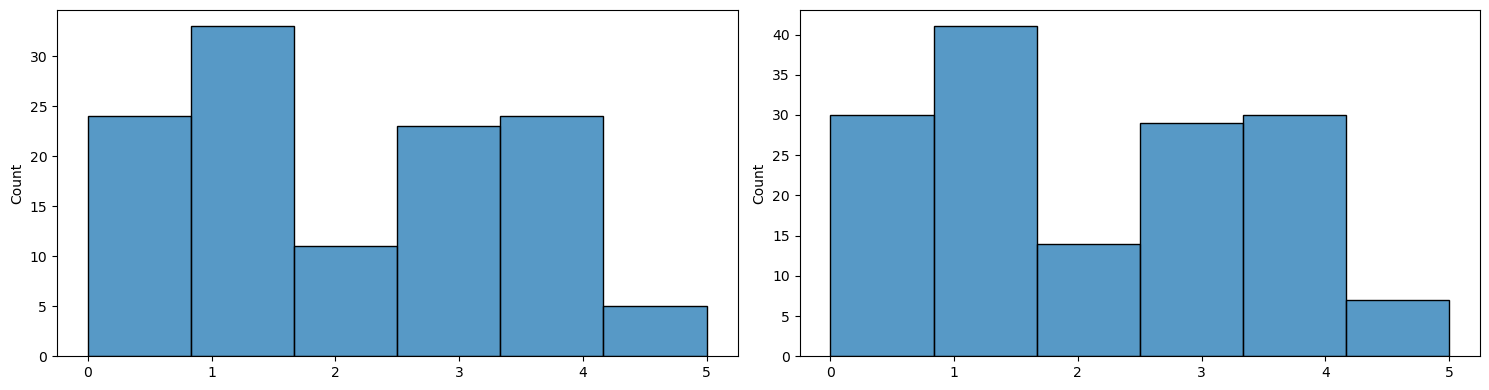

In [56]:
# Comprobación de la uniformidad de las etiquetas en los conjuntos de datos de train y test

print(f"Conjunto de sets de Train:\n{pd.Series(Y_train).value_counts()}\n")
print(f"Conjunto de sets de Test:\n{pd.Series(Y_test).value_counts()}\n")

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.histplot(Y_train, bins = len(np.unique(Y)))

plt.subplot(1, 2, 2)
sns.histplot(Y, bins = len(np.unique(Y)))

plt.tight_layout()
plt.show()

In [57]:
# Manejo de balance de clases mediante SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE = imblearn.over_sampling.SMOTE(random_state = 31, k_neighbors = 3)

X_train_balanceado, Y_train_balanceado = SMOTE.fit_resample(X_train, Y_train)

print(X_train_balanceado.shape, Y_train_balanceado.shape)

(198, 135) (198,)


In [58]:
#Obtencion de las clases balanceadas

print(pd.Series(Y_train_balanceado).value_counts())

3    33
4    33
1    33
2    33
0    33
5    33
Name: count, dtype: int64


In [59]:
#Volvemos a llamar X_train e Y_train a los valores balanceados

X_train, Y_train = X_train_balanceado, Y_train_balanceado

In [60]:
X_train_balanceado

array([[0.03107224, 0.08950942, 0.19211835, ..., 0.94161494, 0.43453087,
        0.36680273],
       [0.68172602, 0.61298873, 0.19936974, ..., 0.17826111, 0.70295791,
        0.66882391],
       [0.04546759, 0.06866768, 0.31490004, ..., 0.60069907, 0.68814631,
        0.19256431],
       ...,
       [0.62994981, 0.24672568, 0.81957557, ..., 0.29107915, 0.22387613,
        0.30942037],
       [0.40852896, 0.06061577, 0.88984497, ..., 0.21068381, 0.25079997,
        0.39857006],
       [0.46140102, 0.12126823, 0.82204477, ..., 0.19849056, 0.16884459,
        0.19893551]])

In [61]:
Y_train_balanceado

array([3, 4, 3, 1, 3, 2, 0, 4, 1, 0, 2, 1, 1, 1, 1, 4, 1, 4, 4, 1, 3, 0,
       4, 3, 0, 3, 1, 4, 0, 1, 1, 3, 4, 4, 3, 4, 3, 2, 0, 1, 0, 4, 4, 1,
       4, 4, 3, 1, 0, 4, 1, 1, 1, 2, 3, 3, 4, 4, 1, 3, 2, 3, 4, 3, 1, 5,
       0, 5, 3, 5, 2, 3, 3, 4, 1, 4, 0, 5, 5, 1, 3, 1, 3, 1, 0, 0, 3, 0,
       1, 0, 0, 1, 4, 4, 4, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 3, 0, 3, 0, 4, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### **Una vez obtenido el X_train_balanceado y el Y_train_balanceado vamos a hacer la seleccion de modelos**

In [63]:
# Metodo 1º: Seleccion de modelos a partir del Cross Validation (Stratified K-Fold) 

avg = lambda x: x.sum() / len(x) #Crea el promedio de los valores de X

models = [LogisticRegression(solver = "liblinear", multi_class = "auto"), SVC(), AdaBoostClassifier(random_state = 31), RandomForestClassifier(n_estimators = 151, class_weight = "balanced"), KNeighborsClassifier(6, n_jobs = -1), GaussianNB()]
model_names = ["Logistic Regression", "SVC", "AdaBoostClassifier", "Random Forest", "KNN", "GNB"]
scores = []

for idx, model in enumerate(models): #Se itera sobre la lista de modelos y se entrena cada modelo utilizando la función cross_val_score con validación cruzada de 5 divisiones (cv=5). 
    scores.append(avg(cross_val_score(model, X_train, Y_train, cv = 5))) #cv significa que el conjunto de datos se divide en 5 partes iguales. El modelo se entrena 5 veces, cada vez utilizando 4 partes para entrenamiento y 1 parte para evaluación. Calcula el rendimiento del modelo en cada división de prueba y se devuelve una matriz de puntajes de rendimiento.
    print(f"{model_names[idx]} entrenamiento completado !")

model_scores = {x : y for x, y in zip(model_names, scores)}
print(model_scores)

Logistic Regression entrenamiento completado !
SVC entrenamiento completado !
AdaBoostClassifier entrenamiento completado !
Random Forest entrenamiento completado !
KNN entrenamiento completado !
GNB entrenamiento completado !
{'Logistic Regression': 0.9696153846153847, 'SVC': 0.9494871794871795, 'AdaBoostClassifier': 0.5097435897435898, 'Random Forest': 0.9443589743589744, 'KNN': 0.9088461538461539, 'GNB': 0.9141025641025641}


#### *Como el mejor modelo es Random Forest, vamos a probar con Random Forest*

In [64]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

### *Predicciones con RandomForest*

In [65]:
Yhat = model.predict(X_test)

Yhat

array([0, 1, 5, 1, 0, 2, 2, 1, 4, 5, 3, 3, 0, 3, 3, 3, 0, 1, 2, 0, 4, 4,
       4, 4, 4, 4, 1, 3, 1, 0, 1])

## **4º  Métricas**: para valorar el resultado de nuestro Random Forest

1. **Índice de Jaccard (Jaccard Index):** Mide la similitud entre dos conjuntos, siendo la proporción de elementos comunes entre ellos.

2. **Accuracy:** Mide la proporción de predicciones correctas sobre el total de predicciones.

3. **Precision (Precisión):** Mide la proporción de predicciones positivas correctas entre todas las predicciones positivas hechas por el clasificador.

4. **Recall (Sensibilidad o Exhaustividad):** Mide la proporción de instancias positivas correctamente identificadas sobre el total de instancias positivas reales.

5. **Especificidad (Tasa de Verdaderos Negativos):** Mide la proporción de instancias negativas correctamente identificadas sobre el total de instancias negativas reales. No se puede calcular con "sklearn.metrics"

6. **F1-Score:** Combina precision y recall en una sola métrica, es útil cuando buscas equilibrar ambas.

In [66]:
print("Jaccard Index:", jaccard_score(Y_test, Yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(Y_test, Yhat))
print("Precisión:"    , precision_score(Y_test, Yhat, average = "macro"))
print("Sensibilidad:" , recall_score(Y_test, Yhat, average = "macro"))
print("F1-score:"     , f1_score(Y_test, Yhat, average = "macro"))

Jaccard Index: 0.9077380952380952
Accuracy: 0.9354838709677419
Precisión: 0.9484126984126985
Sensibilidad: 0.951388888888889
F1-score: 0.9482905982905984


####  **4.1 Confusion Matrix**: sirve para evaluar la precisión de una clasificación

In [67]:
#Ponemos hasta 5 en labels por el numero de clases que tiene la columna "type"

confusion_matrix(Y_test, Yhat, labels = [0, 1, 2, 3, 4, 5])

array([[5, 0, 0, 0, 1, 0],
       [1, 7, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

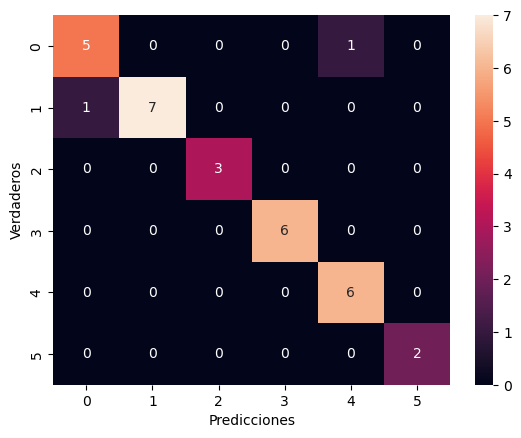

In [68]:
#Representacion de la confusion matrix en un mapa de calor

conf_matrix = metrics.confusion_matrix(Y_test, Yhat)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicciones")
plt.ylabel("Verdaderos")
plt.show()

### **4.2 Classification Report**

In [69]:
#Se hace Reportaje de clasificacion para obtener una estimacion de las metricas dependiendo de Y_test e Yhat

clf_reporte = metrics.classification_report(Y_test, Yhat, digits = 2)
print(clf_reporte)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.95      0.95      0.95        31
weighted avg       0.94      0.94      0.94        31



### **4.3 Atributos y Métodos**: vamos a obtener informacion sobre el modelado

In [70]:
# .predict_proba() obtiene las probabilidades de pertenencer a una clase para cada muestra en un conjunto de datos

model.predict_proba(X_test)

array([[0.77, 0.05, 0.  , 0.07, 0.11, 0.  ],
       [0.06, 0.89, 0.  , 0.01, 0.01, 0.03],
       [0.21, 0.2 , 0.04, 0.08, 0.14, 0.33],
       [0.17, 0.76, 0.02, 0.  , 0.01, 0.04],
       [0.65, 0.09, 0.08, 0.01, 0.16, 0.01],
       [0.07, 0.15, 0.72, 0.01, 0.03, 0.02],
       [0.  , 0.01, 0.98, 0.01, 0.  , 0.  ],
       [0.15, 0.7 , 0.13, 0.  , 0.02, 0.  ],
       [0.03, 0.03, 0.09, 0.25, 0.6 , 0.  ],
       [0.08, 0.02, 0.01, 0.18, 0.16, 0.55],
       [0.13, 0.03, 0.  , 0.63, 0.21, 0.  ],
       [0.  , 0.  , 0.  , 0.87, 0.02, 0.11],
       [0.83, 0.05, 0.  , 0.01, 0.1 , 0.01],
       [0.07, 0.02, 0.  , 0.6 , 0.3 , 0.01],
       [0.01, 0.  , 0.  , 0.94, 0.05, 0.  ],
       [0.01, 0.  , 0.  , 0.72, 0.27, 0.  ],
       [0.77, 0.14, 0.  , 0.02, 0.07, 0.  ],
       [0.15, 0.72, 0.02, 0.02, 0.  , 0.09],
       [0.01, 0.01, 0.96, 0.  , 0.  , 0.02],
       [0.58, 0.27, 0.  , 0.02, 0.12, 0.01],
       [0.33, 0.12, 0.  , 0.06, 0.49, 0.  ],
       [0.08, 0.02, 0.  , 0.21, 0.68, 0.01],
       [0.

### *Se va a obtener las columnas mas importantes con Feature Importance*

In [72]:
# Calculamos Feature Importance
importances = model.feature_importances_

In [73]:
# Creamos un DataFrame para almacenar las características y sus importancias
df_importances = pd.DataFrame(data=zip(df.columns, importances),
                              columns=["Columnas", "Importancia"])

In [74]:
# Ordenamos las características por importancia en orden descendente
df_importances = df_importances.sort_values("Importancia", ascending=False)

In [77]:
# Imprimimos las características más importantes
print("Feature Importance:")
for index, (feature, importance) in enumerate(df_importances.values):
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

Feature Importance:
 1. feature  0 ( 0.04812541214614369): 205081_at
 2. feature  1 (0.031496956598398976): 228241_at
 3. feature  2 (0.027545999586188114): 224795_x_at
 4. feature  3 ( 0.02509586364312114): 228554_at
 5. feature  4 (  0.0237008727408306): 213831_at
 6. feature  5 (0.022524800650232858): 1555745_a_at
 7. feature  6 (0.021839405104398843): 223062_s_at
 8. feature  7 (0.020785414718992864): 226147_s_at
 9. feature  8 (0.018516765608000925): 242579_at
10. feature  9 (0.018336837179147338): 234764_x_at
11. feature 10 (0.017750708700175255): 218963_s_at
12. feature 11 (0.017093292410586367): 223631_s_at
13. feature 12 (0.017025126501843745): 202036_s_at
14. feature 13 ( 0.01661345057658213): 202018_s_at
15. feature 14 (0.016404939853203557): 206799_at
16. feature 15 ( 0.01619948475087185): 217022_s_at
17. feature 16 (0.015566916923180726): 1558034_s_at
18. feature 17 (0.015480977590524959): 215076_s_at
19. feature 18 (0.015050248980544767): 220625_s_at
20. feature 19 (0.014

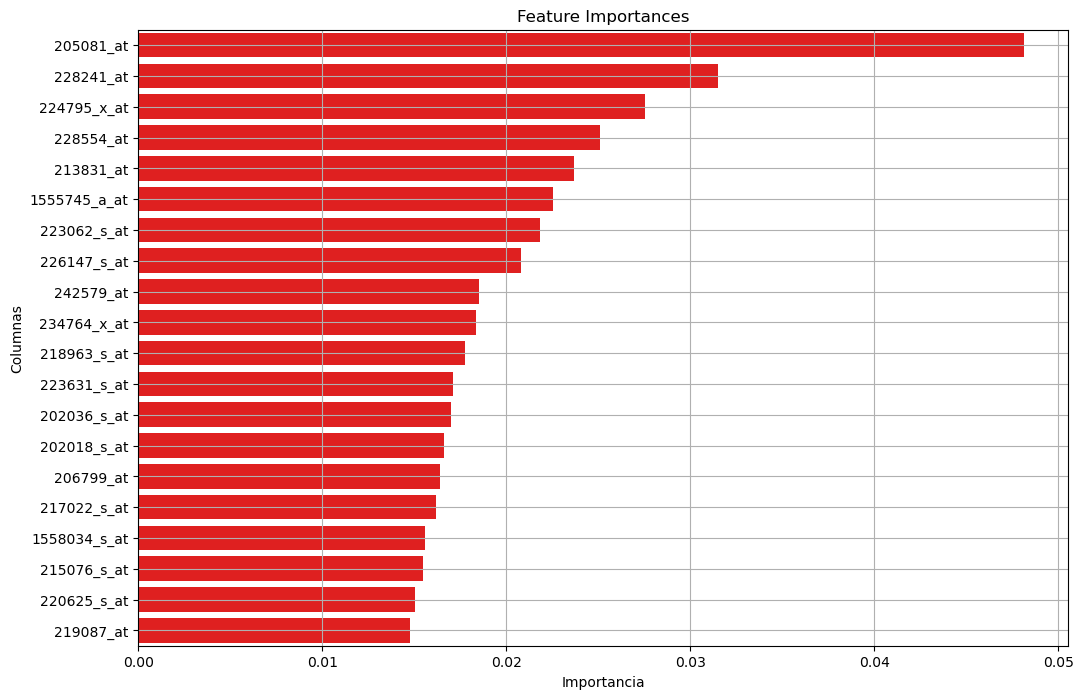

In [76]:
# Creamos el gráfico de barras para visualizar las importancias de las características
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
sns.barplot(x=df_importances["Importancia"].head(20), y=df_importances["Columnas"].head(20), color="red")
plt.grid()
plt.show()

### *Una vez obtenido el Feature Importance, vamos a ver los parametros de Random Forest*

In [78]:
#.get_params() es para obtener los parametros del modelo de Random Forest

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
# El model.estimators_ proporciona acceso a cada uno de los árboles de decisión que componen el modelo de Random Forest.

model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1346343045),
 DecisionTreeClassifier(max_features='sqrt', random_state=64329868),
 DecisionTreeClassifier(max_features='sqrt', random_state=1805272612),
 DecisionTreeClassifier(max_features='sqrt', random_state=2131602854),
 DecisionTreeClassifier(max_features='sqrt', random_state=2120933093),
 DecisionTreeClassifier(max_features='sqrt', random_state=650597950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1265906319),
 DecisionTreeClassifier(max_features='sqrt', random_state=209293013),
 DecisionTreeClassifier(max_features='sqrt', random_state=2010626191),
 DecisionTreeClassifier(max_features='sqrt', random_state=1636467390),
 DecisionTreeClassifier(max_features='sqrt', random_state=1076706909),
 DecisionTreeClassifier(max_features='sqrt', random_state=2737857),
 DecisionTreeClassifier(max_features='sqrt', random_state=525186728),
 DecisionTreeClassifier(max_features='sqrt', random_state=288653572),
 DecisionTreeCl

In [80]:
model.estimators_[0].feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20041672, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06225267, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02279691, 0.        , 0.01177696, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19488293, 0.03151133,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17115494, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01078564, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### **4.4 Parametros de .get_depth() y .get_leaves()**

In [81]:
# .get_depth() vemos la profundidad de los arboles de decision de cada fila

model.estimators_[0].get_depth()

7

Counter({8: 36, 6: 27, 7: 26, 9: 8, 10: 3})


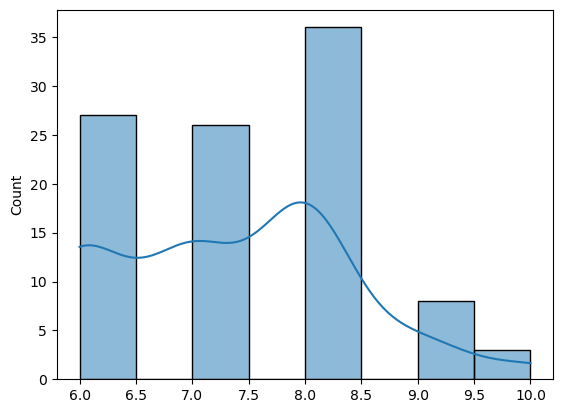

In [82]:
# .get_depth(): Calculo de las profundidades, cada fila tiene una profundidad

print(Counter([x.get_depth() for x in model.estimators_]))

sns.histplot([x.get_depth() for x in model.estimators_], kde = True)
plt.show()

In [83]:
#.get_n_leaves() es el número total de hojas (nodos terminales) en ese árbol específico.

model.estimators_[0].get_n_leaves()

13

Counter({16: 20, 15: 16, 18: 16, 19: 13, 17: 11, 14: 8, 13: 5, 20: 4, 12: 3, 22: 2, 21: 2})


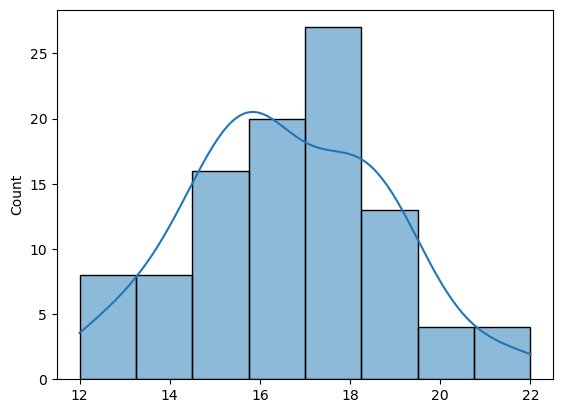

In [84]:
# .get_n_leaves(): obtiene el numero de hoja en cada arbol de decisiones

print(Counter([x.get_n_leaves() for x in model.estimators_]))

sns.histplot([x.get_n_leaves() for x in model.estimators_], kde = True)
plt.show()

In [85]:
#model.base_estimator: Coge el modelo estimador que hemos calculado previamente
#En este caso, se refiere al tipo de árbol utilizado como estimador base para construir el bosque aleatorio. Por defecto, los árboles de decisión son los estimadores base en Random Forests.

print(f"Estimador Base: {model.estimator}")

print("*"*100)

for num, estimador in enumerate(model.estimators_):
    print(f"Estimador {num}: {estimador}")
    
print(f"Numero de estimadores: {len(model.estimators_)}")

Estimador Base: DecisionTreeClassifier()
****************************************************************************************************
Estimador 0: DecisionTreeClassifier(max_features='sqrt', random_state=1346343045)
Estimador 1: DecisionTreeClassifier(max_features='sqrt', random_state=64329868)
Estimador 2: DecisionTreeClassifier(max_features='sqrt', random_state=1805272612)
Estimador 3: DecisionTreeClassifier(max_features='sqrt', random_state=2131602854)
Estimador 4: DecisionTreeClassifier(max_features='sqrt', random_state=2120933093)
Estimador 5: DecisionTreeClassifier(max_features='sqrt', random_state=650597950)
Estimador 6: DecisionTreeClassifier(max_features='sqrt', random_state=1265906319)
Estimador 7: DecisionTreeClassifier(max_features='sqrt', random_state=209293013)
Estimador 8: DecisionTreeClassifier(max_features='sqrt', random_state=2010626191)
Estimador 9: DecisionTreeClassifier(max_features='sqrt', random_state=1636467390)
Estimador 10: DecisionTreeClassifier(max_f

In [86]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1346343045)

### **5. Aplicacion de Tuning a partir de los hiperparametros**

In [87]:
#Esto sirve para escoger a partir de nuestro modelo (Random Forest), escoger los mejores parametros para trabajar con ello

%%time

model = RandomForestClassifier()

params = {"n_estimators"           : [100,150,200],  # Número de árboles en Random Forest
          "criterion"              : ["gini","entropy"], # Es la función para medir la calidad de una división/split.
          "max_features"           : ["sqrt", "log2"], # El número de características (atributos) a considerar en cada split
          "max_depth"              : range(6,11), # La profundidad máxima del árbol.
          "max_leaf_nodes"         : range(12,23), # Maximo de nodos hoja del arbol
          "random_state"           : [42]} 

scorers = ["f1_macro", "accuracy", "recall_macro"]

grid_solver = GridSearchCV(estimator  = model     , 
                           param_grid = params    , 
                           scoring    = scorers   ,
                           cv         = 10         ,
                           refit      = "accuracy",
                           n_jobs     = -1        ,
                           verbose    = 2)

model_result = grid_solver.fit(X, Y)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

Fitting 10 folds for each of 660 candidates, totalling 6600 fits


c:\Users\Carl\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


0.9240016835016835
0.9202817635226725
0.9079627525252526
****************************************************************************************************
0.9200000000000002
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'n_estimators': 150, 'random_state': 42}
CPU times: total: 14.3 s
Wall time: 6min 10s


In [88]:
#Con el siguiente parametro calculamos los mejores estimadores de los parametros de Random Forest

model_result.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 12,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [89]:
#Con este pprint imprimimos los resultados del proceso de búsqueda en arrays realizado usando GridSearchCV

from pprint import pprint
pprint(model_result.cv_results_)

{'mean_fit_time': array([0.36529896, 0.53323214, 0.75012558, 0.41976545, 0.54620311,
       0.7144654 , 0.40529966, 0.5722002 , 0.77859943, 0.41420052,
       0.56180019, 0.71860023, 0.35560005, 0.53170013, 0.71921558,
       0.35635104, 0.63140008, 0.89129953, 0.40909917, 0.54219968,
       0.7132997 , 0.35169985, 0.53390083, 0.70400059, 0.41049972,
       0.61180136, 0.73019955, 0.36190076, 0.53260043, 0.74160051,
       0.37010031, 0.534201  , 0.70670037, 0.31250033, 0.47593458,
       0.64350679, 0.31799951, 0.48099999, 0.62530284, 0.32571127,
       0.48515656, 0.64609854, 0.3395005 , 0.5071007 , 0.66176391,
       0.33010271, 0.49509914, 0.68700011, 0.39580178, 0.55509806,
       0.64840028, 0.32950077, 0.4893965 , 0.70249658, 0.35260003,
       0.51179619, 0.65800068, 0.35689993, 0.54079919, 0.64848716,
       0.32335286, 0.48660049, 0.6469995 , 0.32600024, 0.48169992,
       0.64949818, 0.35369687, 0.55580013, 0.81380007, 0.45589907,
       0.57429719, 0.76250041, 0.36840041, 0

In [90]:
#Calculo de los resultados de recall_macro, f1_macro y test_accuracy

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())

#Imprimimos las mejores puntuaciones y los mejores parametros de nuestro Random Forest

print(model_result.best_score_)
print(model_result.best_params_)

0.9240016835016835
0.9202817635226725
0.9079627525252526
0.9200000000000002
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'n_estimators': 150, 'random_state': 42}


In [91]:
resultados = {'criterion': 'entropy',
              'max_depth': 6,
              'max_features': "sqrt",
              'max_leaf_nodes': 12,
              'n_estimators': 150,
              'random_state': 42}

In [92]:
resultados

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 12,
 'n_estimators': 150,
 'random_state': 42}

In [93]:
#Guardar el modelo

mejor_modelo = RandomForestClassifier(**resultados) #El uso de ** desempaqueta el diccionario de resultados para que cada clave-valor se convierta en un argumento de palabra clave para el constructor de RandomForestClassifier.
mejor_modelo.fit(X, Y)

with open("mejor_modelo_var.pkl", "bw") as file:
    pickle.dump(mejor_modelo, file)

### **Conclusion:**

- *El mejor modelo para nuestra base de datos es Random Forest con una evaluacion de 0.97 o 97%*.

- *Esto quiere decir que, la fiabilidad de que tengamos nuevas muestras y queramos deducir el subtipo de cancer que tiene, habrá una gran posibilidad de acertar gracias a nuestro modelo*